In [2]:
import pandas as pd
import geopandas as gpd
%matplotlib inline

humpDay = pd.read_csv("data/speedhumps.csv")

humpDay.head()

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,430808404,1,4337.0,Saline St,9257,Asphalt,Squirrel Hill South,5,14,42003141400,3,14,4,2-15,40.419835,-79.926062
1,1520886592,2,NaN,Summerset Dr,15346,NaN,Squirrel Hill South,5,14,42003141400,3,14,4,2-20,40.425040,-79.912040
2,858537521,3,511.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.456746,-79.954521
3,297775878,4,547.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.457333,-79.954899
4,1061197751,5,593.0,Gold Way,1755,Asphalt,North Oakland,6,5,42003562000,3,5,4,2-23,40.458061,-79.955355


In [3]:
amount = {}

for index, row in humpDay.iterrows():
    hood = row['neighborhood']
    if hood in amount:
        amount[hood] += 1
    else:
        amount[hood] = 1
print(amount)

{'Squirrel Hill South': 18, 'North Oakland': 6, 'Brookline': 4, 'Bloomfield': 3, 'Polish Hill': 6, 'Homewood South': 4, 'Mount Washington': 3, 'South Side Flats': 3, 'Central Oakland': 1, 'Squirrel Hill North': 3, 'Upper Hill': 4, 'Highland Park': 2, 'Carrick': 9, 'Perry North': 4, 'South Side Slopes': 4, 'Garfield': 3, 'Stanton Heights': 1, 'Overbrook': 1}


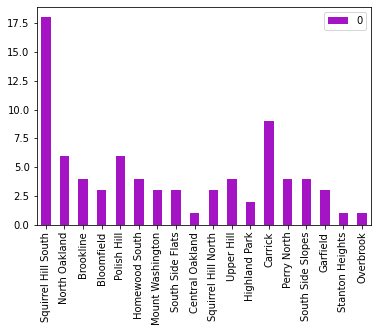

In [16]:
graphableHumps = pd.DataFrame.from_dict(amount, orient='index', dtype=None, columns=None)

graphableHumps.plot.bar(color="#A414C4")